In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

aisle = pd.read_csv("aisles.csv")
departments = pd.read_csv("departments.csv")
orders = pd.read_csv("orders.csv")
products = pd.read_csv("products.csv")
order_products_prior = pd.read_csv("order_products__prior.csv")
order_products_train = pd.read_csv("order_products__train.csv")

In [2]:
#checking all dataset
aisle.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [6]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
#checking for unique id's in products' table

print(products.aisle_id.nunique())
print()
print(products.department_id.nunique())
print()
print(len(products))

134

21

49688


In [9]:
#checking for null values

print("aisle : ",aisle.isna().sum())
print()
print("products : ",products.isna().sum()) 
print()
print("depatments : ",departments.isna().sum())
print()
print("orders : ",orders.isna().sum())
print()
print("order_product_prior : ",order_products_prior.isna().sum())
print()
print("order_product_train : ",order_products_train.isna().sum())

aisle :  aisle_id    0
aisle       0
dtype: int64

products :  product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

depatments :  department_id    0
department       0
dtype: int64

orders :  order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

order_product_prior :  order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

order_product_train :  order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64


In [10]:
#How many products in each department and aisle?
products_aisle = pd.merge(products, aisle, on = 'aisle_id', how = 'left')
products_desc = pd.merge(products_aisle, departments, on = 'department_id', how = 'left')
products_desc.head()

,product_id,product_name,aisle_id,department_id,aisle,department
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes,snacks
1,2,All-Seasons Salt,104,13,spices seasonings,pantry
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea,beverages
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals,frozen
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation,pantry


In [11]:
products_aisle

,product_id,product_name,aisle_id,department_id,aisle
0,1,Chocolate Sandwich Cookies,61,19,cookies cakes
1,2,All-Seasons Salt,104,13,spices seasonings
2,3,Robust Golden Unsweetened Oolong Tea,94,7,tea
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1,frozen meals
4,5,Green Chile Anytime Sauce,5,13,marinades meat preparation
...,...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5,spirits
49684,49685,En Croute Roast Hazelnut Cranberry,42,1,frozen vegan vegetarian
49685,49686,Artisan Baguette,112,3,bread
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8,cat food care


Text(0.5, 0, 'Department Name')

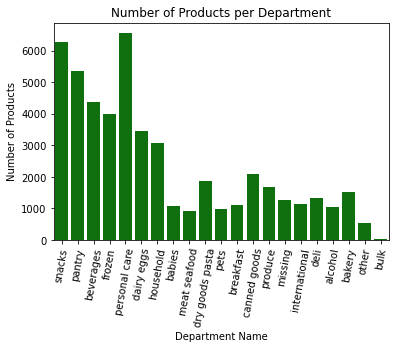

In [12]:
#Creating bar graph : Number of Products per Department
sns.countplot(x='department', data= products_desc,color = 'green')
plt.title('Number of Products per Department')
plt.xticks(rotation=80)
plt.ylabel('Number of Products')
plt.xlabel('Department Name')

Text(0.5, 0, 'Number of Hours')

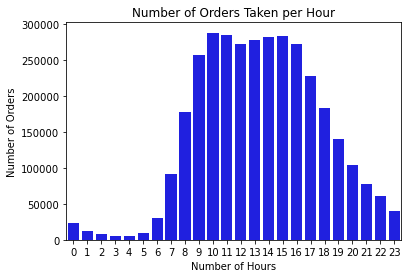

In [13]:
#Number of orders taken by hour of the Day
sns.countplot(x='order_hour_of_day', data= orders, color = 'blue')
plt.title('Number of Orders Taken per Hour')
plt.ylabel('Number of Orders')
plt.xlabel('Number of Hours')

In [14]:
#Analysis of which department got orders the most
ordprd_train = pd.merge(order_products_train, products_desc, on = 'product_id', how = 'left')
ordprd_train.head()
ordprd_train.groupby('department').order_id.count()

department
alcohol              5598
babies              14941
bakery              48394
beverages          114046
breakfast           29500
bulk                 1359
canned goods        46799
dairy eggs         217051
deli                44291
dry goods pasta     38713
frozen             100426
household           35986
international       11902
meat seafood        30307
missing              8251
other                1795
pantry              81242
personal care       21570
pets                 4497
produce            409087
snacks             118862
Name: order_id, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'dairy eggs'),
  Text(1, 0, 'produce'),
  Text(2, 0, 'canned goods'),
  Text(3, 0, 'beverages'),
  Text(4, 0, 'deli'),
  Text(5, 0, 'snacks'),
  Text(6, 0, 'pantry'),
  Text(7, 0, 'frozen'),
  Text(8, 0, 'meat seafood'),
  Text(9, 0, 'household'),
  Text(10, 0, 'bakery'),
  Text(11, 0, 'personal care'),
  Text(12, 0, 'dry goods pasta'),
  Text(13, 0, 'babies'),
  Text(14, 0, 'missing'),
  Text(15, 0, 'other'),
  Text(16, 0, 'breakfast'),
  Text(17, 0, 'international'),
  Text(18, 0, 'alcohol'),
  Text(19, 0, 'bulk'),
  Text(20, 0, 'pets')])

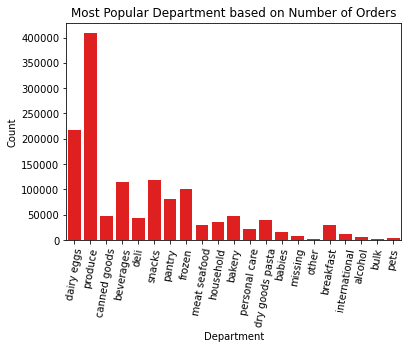

In [16]:
sns.countplot(x='department', data= ordprd_train, color = 'red')
plt.title('Most Popular Department based on Number of Orders')
plt.ylabel('Count')
plt.xlabel('Department')
plt.xticks(rotation=80)
# produce, dairy eggs are popular

In [17]:
ordprd_train

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,1,49302,1,1,Bulgarian Yogurt,120,16,yogurt,dairy eggs
1,1,11109,2,1,Organic 4% Milk Fat Whole Milk Cottage Cheese,108,16,other creams cheeses,dairy eggs
2,1,10246,3,0,Organic Celery Hearts,83,4,fresh vegetables,produce
3,1,49683,4,0,Cucumber Kirby,83,4,fresh vegetables,produce
4,1,43633,5,1,Lightly Smoked Sardines in Olive Oil,95,15,canned meat seafood,canned goods
...,...,...,...,...,...,...,...,...,...
1384612,3421063,14233,3,1,Natural Artesian Water,115,7,water seltzer sparkling water,beverages
1384613,3421063,35548,4,1,Twice Baked Potatoes,13,20,prepared meals,deli
1384614,3421070,35951,1,1,Organic Unsweetened Almond Milk,91,16,soy lactosefree,dairy eggs
1384615,3421070,16953,2,1,Creamy Peanut Butter,88,13,spreads,pantry


<AxesSubplot:title={'center':'The Most Popular Department_based on numbers of order'}, xlabel='department'>

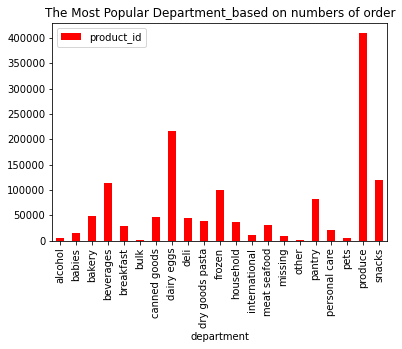

In [18]:
ordered = ordprd_train.groupby('department').product_id.count()
pf_ordered = pd.DataFrame(ordered)
pf_ordered
pf_ordered.plot(kind='bar', color = 'red', title = 'The Most Popular Department_based on numbers of order')

<AxesSubplot:title={'center':'The Most Popular Department_based on numbers of reorder'}, xlabel='department'>

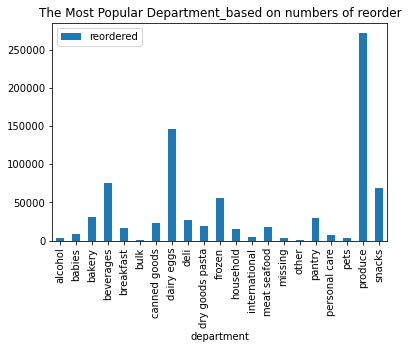

In [19]:
#Analysis of which department got the most reorders
reordered = ordprd_train.groupby('department').reordered.sum()
pf_reordered = pd.DataFrame(reordered)
pf_reordered
pf_reordered.plot(kind='bar', title = 'The Most Popular Department_based on numbers of reorder')